<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Árboles de Regresión
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción

* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable `Sale_Price`.

## Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías clásicas a utilizar.
* Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase `DecisionTreeRegressor`.
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
* Elimine la columna `'Unnamed: 0'` cuando cargue los datos.

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings

> Definimos algunos aspectos de ambiente y valores por defecto de visualización.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (14, 8)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utilizan librerías <strong>sklearn</strong> para el modelo, el tratamiento de escala de valores de los atributos y seleccion de set de datos:

In [4]:
# Método para escalar datos
from sklearn.preprocessing import StandardScaler
# Método para la selección de datos entre entrenamiento, test y CV
from sklearn.model_selection import train_test_split, GridSearchCV
# Método para reportar las métricas de modelos de clasificación
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
# Método para generar un modelo de regresión con arboles de decisión
from sklearn.tree import DecisionTreeRegressor

In [5]:
# Se carga la base de datos y se elimina la columna index que no agrega valor.
df = pd.read_csv('ames_housing.csv').drop(columns = 'Unnamed: 0')

In [6]:
# Inspeccionamos los datos
df.sample(5, random_state=14173)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
1034,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,65,9750,Pave,No_Alley_Access,Regular,Lvl,AllPub,FR2,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Very_Good,1969,1969,Gable,CompShg,HdBoard,HdBoard,None,0,Typical,Typical,CBlock,Good,Typical,No,ALQ,1,LwQ,438,14,1054,GasA,Good,Y,SBrkr,1054,0,0,1054,1,0,1,1,3,1,Typical,6,Typ,0,No_Fireplace,Attchd,Unf,2,460,Typical,Typical,Paved,180,0,0,0,80,0,No_Pool,No_Fence,None,0,7,2008,WD,Normal,151000,-93.627875,42.055390
1234,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,7390,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Average,Good,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,151,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,196,1098,GasA,Typical,Y,SBrkr,1098,0,0,1098,1,0,1,0,3,1,Typical,6,Typ,0,No_Fireplace,Attchd,Unf,1,260,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,7,2008,WD,Normal,135000,-93.617179,42.042373
1808,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,60,12450,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Sawyer_West,RRAe,Norm,OneFam,One_Story,Average,Average,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,126,Good,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,365,1094,GasA,Excellent,Y,SBrkr,1094,0,0,1094,1,0,1,0,3,1,Good,6,Typ,0,No_Fireplace,Detchd,Unf,2,576,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,5,2007,WD,Normal,149000,-93.689120,42.037643
2783,Split_or_Multilevel,Residential_Low_Density,42,10385,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,Gtl,College_Creek,Norm,Norm,OneFam,SLvl,Above_Average,Above_Average,1978,1978,Gable,CompShg,HdBoard,HdBoard,BrkFace,123,Typical,Typical,CBlock,Typical,Good,Av,ALQ,1,LwQ,400,0,995,GasA,Typical,Y,SBrkr,1282,0,0,1282,0,1,2,0,3,1,Typical,6,Typ,0,No_Fireplace,Detchd,Unf,3,672,Fair,Typical,Paved,386,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2006,WD,Normal,174000,-93.687158,42.020070
841,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,60,8072,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,College_Creek,Norm,Norm,OneFam,One_Story,Average,Average,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Good,PConc,Good,Good,No,ALQ,1,Unf,0,244,990,GasA,Excellent,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,Typical,5,Typ,0,No_Fireplace,Detchd,Unf,2,480,Typical,Typical,Paved,0,64,0,0,0,0,No_Pool,No_Fence,None,0,5,2009,WD,Normal,138000,-93.692867,42.019723


___
> Se revisan los datos perdidos para no agregar valores perdidos en la binarización

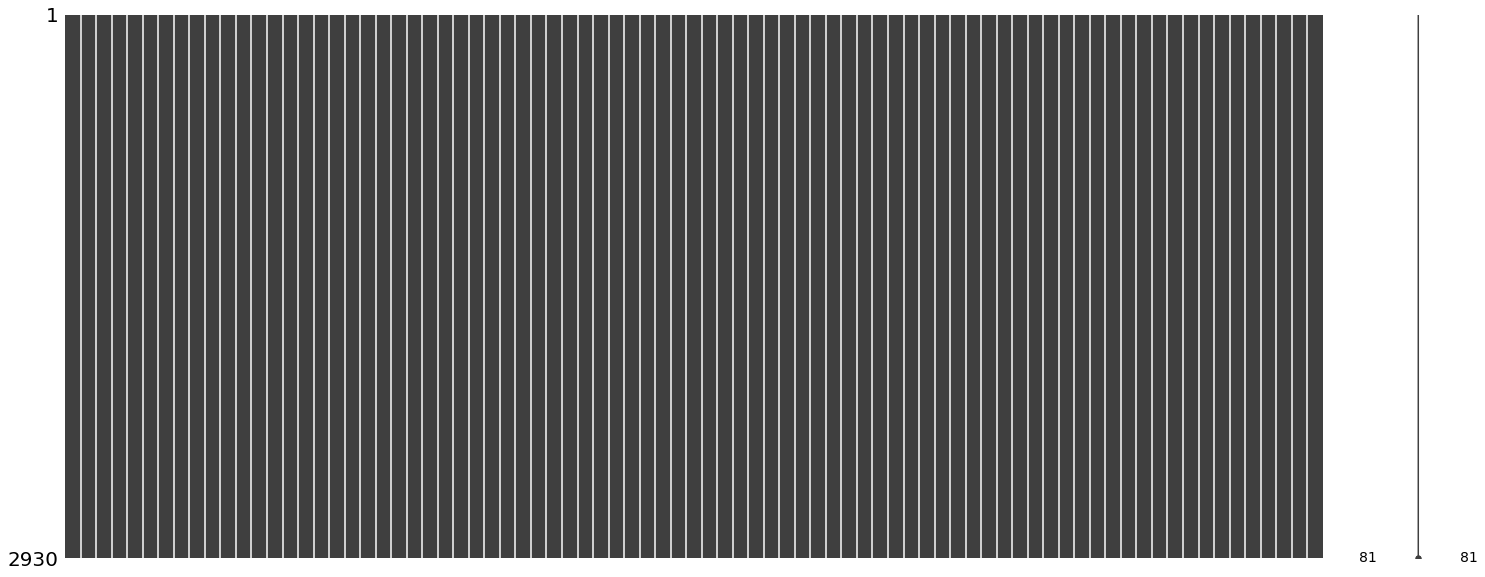

In [7]:
msngo.matrix(df)

> No se observan datos perdidos en la base de datos.

In [8]:
# Revisamos las dimensiones de la base de datos
df.shape

(2930, 81)

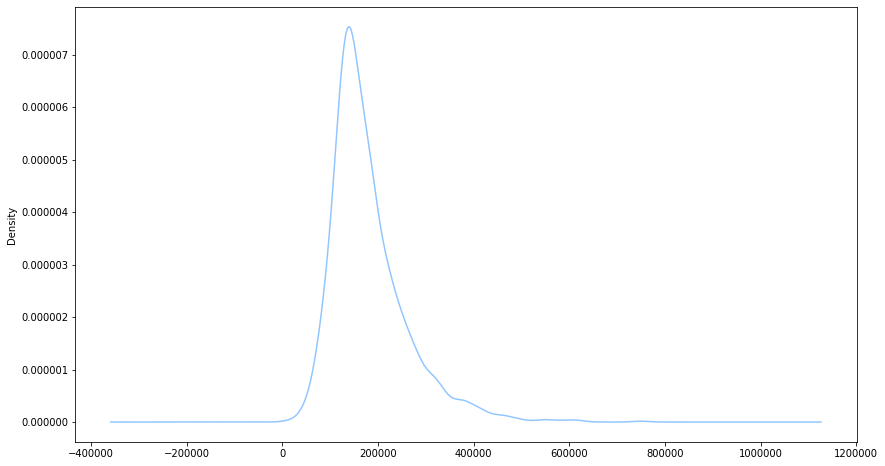

In [9]:
df['Sale_Price'].plot(kind='kde')

> La base de datos se compone de 2930 observaciones con 80 atributos y el vector de clases [Sale_Price]. Se observa que los valores de venta tienen una forma normal con moda en 140.000 aprox. Podríamos pensar en aplicar el logaritmo para aplanar un poco la distribuición, pero los árboles gozan de bondades que nos dan licencia para no trabajar tanto los datos.

## Ejercicio 2: Visualizando la distribución de los atributos

* Identifique si el dtype de cada en nuestra base de datos se considera 'object' o no. Para todas las variables que sean , realice lo siguiente:
  1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
  2. Utilizando el método pd.concat , concatene a los atributos creados en la base de datos.
    * tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento artificial del desempeño del modelo.

> Se utiliza get_dummies para recodificar las variables de tipo `object`.

In [10]:
# Se binarizan las columnas que son tipo objeto
df_bin = pd.get_dummies(df, 
               [x for x in df.columns if df[x].dtype =='object'], 
               dummy_na=False,
               drop_first=True
              )

In [11]:
# Revisamos la muestra
df_bin.sample(5, random_state=14173)

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Sale_Price,Longitude,Latitude,MS_SubClass_One_Story_1945_and_Older,MS_SubClass_One_Story_1946_and_Newer_All_Styles,MS_SubClass_One_Story_PUD_1946_and_Newer,MS_SubClass_One_Story_with_Finished_Attic_All_Ages,MS_SubClass_One_and_Half_Story_Finished_All_Ages,MS_SubClass_One_and_Half_Story_PUD_All_Ages,MS_SubClass_One_and_Half_Story_Unfinished_All_Ages,MS_SubClass_PUD_Multilevel_Split_Level_Foyer,MS_SubClass_Split_Foyer,MS_SubClass_Split_or_Multilevel,MS_SubClass_Two_Family_conversion_All_Styles_and_Ages,MS_SubClass_Two_Story_1945_and_Older,MS_SubClass_Two_Story_1946_and_Newer,MS_SubClass_Two_Story_PUD_1946_and_Newer,MS_SubClass_Two_and_Half_Story_All_Ages,MS_Zoning_C_all,MS_Zoning_Floating_Village_Residential,MS_Zoning_I_all,MS_Zoning_Residential_High_Density,MS_Zoning_Residential_Low_Density,MS_Zoning_Residential_Medium_Density,Street_Pave,Alley_No_Alley_Access,Alley_Paved,Lot_Shape_Moderately_Irregular,Lot_Shape_Regular,Lot_Shape_Slightly_Irregular,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Land_Slope_Mod,Land_Slope_Sev,Neighborhood_Blueste,Neighborhood_Briardale,Neighborhood_Brookside,Neighborhood_Clear_Creek,Neighborhood_College_Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Green_Hills,Neighborhood_Greens,Neighborhood_Iowa_DOT_and_Rail_Road,Neighborhood_Landmark,Neighborhood_Meadow_Village,Neighborhood_Mitchell,Neighborhood_North_Ames,Neighborhood_Northpark_Villa,Neighborhood_Northridge,Neighborhood_Northridge_Heights,Neighborhood_Northwest_Ames,Neighborhood_Old_Town,Neighborhood_Sawyer,Neighborhood_Sawyer_West,Neighborhood_Somerset,Neighborhood_South_and_West_of_Iowa_State_University,Neighborhood_Stone_Brook,Neighborhood_Timberland,Neighborhood_Veenker,Condition_1_Feedr,Condition_1_Norm,Condition_1_PosA,Condition_1_PosN,Condition_1_RRAe,Condition_1_RRAn,Condition_1_RRNe,Condition_1_RRNn,Condition_2_Feedr,Condition_2_Norm,Condition_2_PosA,Condition_2_PosN,Condition_2_RRAe,Condition_2_RRAn,Condition_2_RRNn,Bldg_Type_OneFam,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,Bldg_Type_TwoFmCon,House_Style_One_and_Half_Fin,House_Style_One_and_Half_Unf,House_Style_SFoyer,House_Style_SLvl,House_Style_Two_Story,House_Style_Two_and_Half_Fin,House_Style_Two_and_Half_Unf,Overall_Qual_Average,Overall_Qual_Below_Average,Overall_Qual_Excellent,Overall_Qual_Fair,Overall_Qual_Good,Overall_Qual_Poor,Overall_Qual_Very_Excellent,Overall_Qual_Very_Good,Overall_Qual_Very_Poor,Overall_Cond_Average,Overall_Cond_Below_Average,Overall_Cond_Excellent,Overall_Cond_Fair,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Roof_Matl_CompShg,Roof_Matl_Membran,Roof_Matl_Metal,Roof_Matl_Roll,Roof_Matl_Tar&Grv,Roof_Matl_WdShake,Roof_Matl_WdShngl,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_PreCast,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Other,Exterior_2nd_Plywood,Exterior_2nd_PreCast,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_CBlock,Mas_V

## Ejercicio 3: Primer modelo
* Genere muestras de entrenamiento y validación con `'Sale_Price'` como vector objetivo y los atributos de la base de datos como matriz.
* Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_bin.drop(columns='Sale_Price'), 
                                                    df['Sale_Price'], 
                                                    test_size = .33, 
                                                    random_state = 14173)

* Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. Reporte las principales métricas de desempeño.
* Comente sobre el desempeño.

In [13]:
model_tree = DecisionTreeRegressor().fit(X_train, y_train)

In [14]:
yhat = model_tree.predict(X_test)

In [15]:
afx.report_scores_regressor(y_test, yhat)

Error Cuadrático Medio:
1520435766.0941

Error Medio Absoluto:
17500.0

R cuadrado:
0.77


> De acuerdo al ECM podemos observar que el modelo está sobre estimando en USD 1615MM. Los valores de errores son nominalmente altos, pero están en el orden de los datos. $R^2$ no es relevante, pero explica bastante bien la varianza total de nuestro vector objetivo, en función de los atributos.

## Ejercicio 4: Importancia relativa
* Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
* Comente sobre cuáles son los principales 10 atributos que afectan la predicción de `Sale_Price`.

> Utilizamos la función plot_importance que se encuentra en nuestra librería de funciones auxiliares:

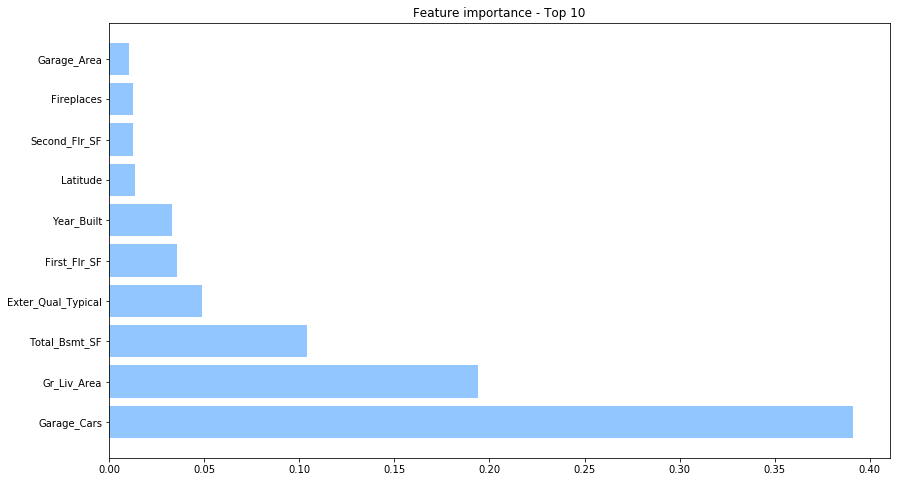

In [16]:
afx.plot_importance(model_tree, df_bin.drop(columns='Sale_Price').columns, top=10)

> Se observa que la cantidad de espacios en el garage de una casa (Garage_Cars) son bastante significativos en relación al resto de atributos, por sobre la superficie habitable (Gr_liv_Area). También se observa que la superficie del sótano (Total_Bsmt_SF), Calidad Tipica del material del exterior (Exter_Qual_Typical), Superficie del primer piso (First_Flr_SF), fecha de construcción (Year_Built), Superficie del segundo piso (Second_Flr_SF) son importante a la hora de determinar el precio de venta de una casa, luego recién aparece la Latitud (Latitude), pero tambien es relevante, posterior está la calidad de la Chimenea - Sin chimenea (Fireplace_Qu_No_Fireplace) y la buena altura del sótano (Bsmt_Qual_Good).

* Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [17]:
attr_importance = ['Garage_Cars', 
                   'Gr_Liv_Area', 
                   'Total_Bsmt_SF', 
                   'Exter_Qual_Typical', 
                   'First_Flr_SF', 
                   'Year_Built', 
                   'Second_Flr_SF', 
                   'Latitude', 
                   'Fireplace_Qu_No_Fireplace', 
                   'Bsmt_Qual_Good', 
                   'Sale_Price']
df_bin_importance = df_bin.loc[:,attr_importance]

> Revisamos como nos queda la nueva base de datos.

In [18]:
df_bin_importance.sample(5, random_state=14173)

,Garage_Cars,Gr_Liv_Area,Total_Bsmt_SF,Exter_Qual_Typical,First_Flr_SF,Year_Built,Second_Flr_SF,Latitude,Fireplace_Qu_No_Fireplace,Bsmt_Qual_Good,Sale_Price
1034,2,1054,1054,1,1054,1969,0,42.055390,1,1,151000
1234,1,1098,1098,1,1098,1955,0,42.042373,1,0,135000
1808,2,1094,1094,0,1094,2003,0,42.037643,1,1,149000
2783,3,1282,995,1,1282,1978,0,42.020070,1,0,174000
841,2,990,990,1,990,1994,0,42.019723,1,1,138000


## Ejercicio 5: Refactorización del modelo y pickling

* En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
* __Dentro de los datos de entrenamiento__ genere una búsqueda de grila con `GridSearchCV` utilizando los siguientes hiperparámetros:
  * Máximo de atributos: Evalúe todos los posibles atributos. 
  * Máximo de profundidad: entre 1 a 32.
  * Validaciones cruzadas : 5.
* Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el desempeño __en la muestra de validación__ con el modelo por defecto.

In [19]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_bin_importance.drop(columns='Sale_Price'), 
                                                    df['Sale_Price'], 
                                                    test_size = .33, 
                                                    random_state = 14173)

> Para efectos de replicación de resultados y consistencia entre los resultados y los comentarios, vamos a fijar la aleatoriedad de la librería numpy, que es la función random que usa sklearn.

In [20]:
np.random.seed(40)

In [21]:
model_tree_2 = GridSearchCV(DecisionTreeRegressor(), 
                            param_grid={'max_depth': np.linspace(1, 32, 32), 
                                        'max_features': list(range(1,X_train_2.shape[1]))},
                            cv=5, ).fit(X_train_2, y_train_2)

In [22]:
model_tree_2.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=8.0, max_features=6,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

> Al solicitar la mejor combinación de hiperparámetros, GridSearchCV nos informa que el máximo deprofundidad necesaria de los nodos es de 8, con un máximo de 6 atributos informativos.

In [23]:
model_tree_2.best_params_

{'max_depth': 8.0, 'max_features': 6}

> Para DecisionTreeClassifier se usa $R^2$ como función de score es:

In [24]:
model_tree_2.best_score_

0.7747297821879745

> Vamos a predecir:

In [25]:
yhat_2 = model_tree_2.predict(X_test_2)

> Evaluamos la predicción:

In [26]:
afx.report_scores_regressor(y_test_2, yhat_2)

Error Cuadrático Medio:
1254786559.697

Error Medio Absoluto:
15497.8824

R cuadrado:
0.81


> De acuerdo al ECM podemos observar que el modelo está sobre estimando en USD 1254MM. Los valores de errores son nominalmente altos, pero están en el orden de los datos. $R^2$ no es relevante, pero explica bastante bien la varianza total de nuestro vector objetivo, en función de los atributos. $R^2$ es levemente mejor en los datos de prueba. El modelo mejora, pero el orden de los valores no es sustancialmente mejor.

### Pickling
* Ahora generaremos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados. Para ello importe el módulo pickle .
* `pickle` contiene la función `dump`, que permite guardar el modelo desarrollado. La forma canónica para desarrollar el pickling es:

```python
pickle.dump(<OBJETO_CON_EL_MODELO>, open('nombre-apellido-actividad07.sav', 'wb'))
```
* Envíe su modelo y conjuntos de entrenamiento a un compañero.

In [27]:
import pickle

In [28]:
objects = [model_tree_2, X_train_2, X_test_2, y_train_2, y_test_2]

In [29]:
pickle.dump(objects, open('pablo-rocco-actividad07.sav', 'wb'))